# Basic Waveforms

Well known basic waveforms can be generated with spefific Fourier series.
This knowledge can be used to synthesize musical timbres, since 
the sound of certain instruments is similar to these 
basic waveforms.

The following examples illustrate properties of spectra 
and waveforms for three basic waveforms. In a Jupyter notebook,
fundamental frequency and number of partials can be adjusted 
and the result can be played back. In the static HTML version,
fixed values are used.

## Triangular

- only odd harmonics
- alternating sign (phase)

$X(t) = \frac{8}{\pi^2} \sum\limits_{i=0}^{N} (-1)^{(i)} \frac{\sin(2 \pi (2i +1) f\ t)}{(2i +1)^2}$


In [1]:
# define a Python function for the triangular wave

def triang(t,f0, fs, nPartials):

    y = np.zeros(len(t))
    for partCNT in range(nPartials):
        if partCNT*f0 < fs/4:
            y += (8/pow(pi,2)) * pow(-1, partCNT) * \
            sin(2*pi* f0 * (2* partCNT +1) *t) *  \
            (1/pow(2*partCNT+1,2))  
    
    return y

In /home/anwaldt/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/anwaldt/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/anwaldt/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/anwaldt/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/anwaldt/.local/lib/python3.6/site-packages/matplotlib/mpl-d

<IPython.core.display.Javascript object>


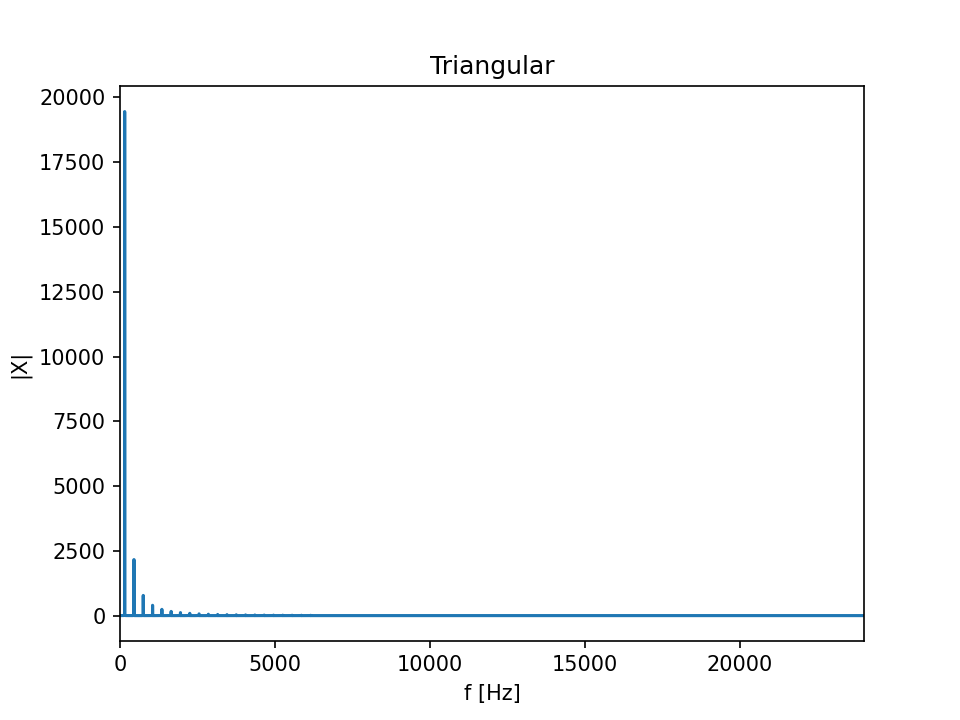

Static output:


Dynamic output:


interactive(children=(IntSlider(value=5, description='nPartials'), IntSlider(value=200, description='f0', max=…

In [2]:
# visualize spectrum

import numpy as np
from   numpy import linspace, sin, zeros
from   math import pi
%matplotlib notebook
import matplotlib.pyplot as plt
from   tikzplotlib import save as tikz_save

from   IPython.display import display, Markdown, clear_output
import IPython.display as ipd
import ipywidgets as widgets
from   ipywidgets import *

nPartials   = 10 # number of partials
f0          = 200  # signal frequency
fs          = 48000
N           = fs

t = np.linspace(0,N/fs,N)
f = np.linspace(-0.5,0.5,fs)

x = triang(t,f0,fs,nPartials)
 
fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)
plt.title("Triangular")

X = abs(np.fft.fft(x))
X = np.fft.fftshift(X)
f = np.linspace(-fs/2,fs/2,len(X))

line, = ax.plot(f,X);

ax.set_xlabel('f [Hz]');
ax.set_ylabel('|X|');
ax.set_xlim(0, fs/2) 
 
print('Static output:')
ipd.display(ipd.Audio(x, rate=fs))
print('Dynamic output:')
    
    
def update(nPartials = widgets.IntSlider(min = 0, max= 100, step=1, value=5),
          f0 = widgets.IntSlider(min = 1, max= 1000, step=1, value=200)):          
     
        
    x = triang(t,f0,fs,nPartials)
 
    X = abs(np.fft.fft(x))
    X = np.fft.fftshift(X)
    
    line.set_ydata(X)
    fig.canvas.draw_idle()
 
    ipd.display(ipd.Audio(x, rate=fs))
    
        
interact(update);

## Square Wave

- only odd harmonics 
- constant sign 
- found in spectra of  wind instruments

$X(t) = \frac{4}{\pi} \sum\limits_{i=0}^{N} \frac{\sin(2 \pi (2i+1)ft)}{(2i + 1)}$

In [3]:
# define a Python function for the square wave

def square(t,f0, fs, nPartials):

    y = np.zeros(len(t))
    
    for partCNT in range(nPartials):

        if partCNT*f0 < fs/4:
            y += (4/np.pi) * (np.sin(2*np.pi* f0 * (2* partCNT +1) *t)/(2*partCNT+1))
        
    return y    

<IPython.core.display.Javascript object>


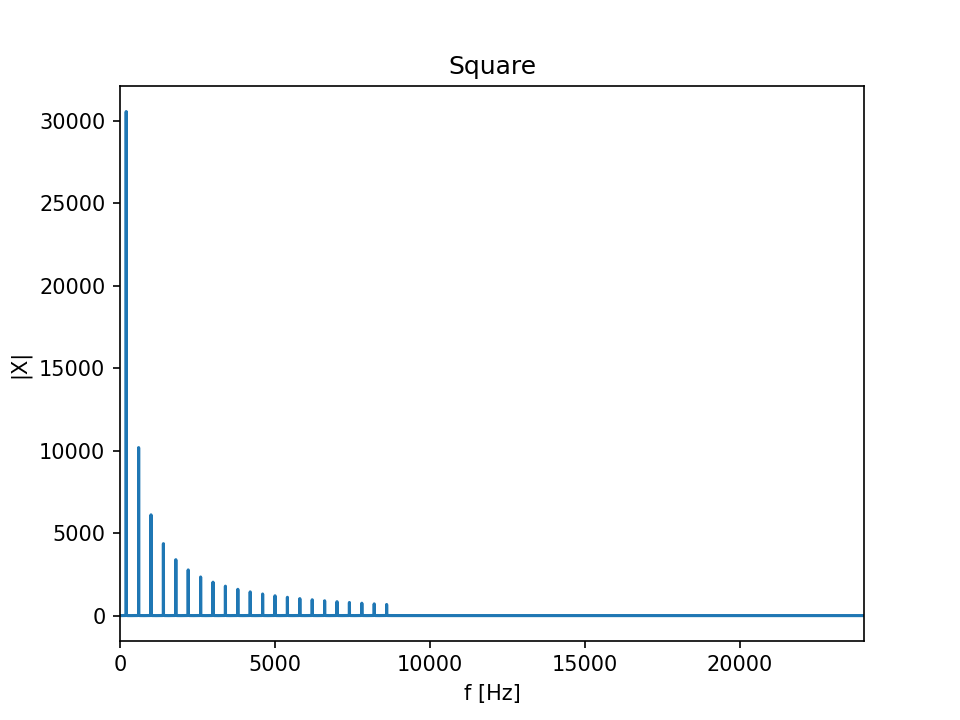

Static output:


Dynamic output:


interactive(children=(IntSlider(value=10, description='nPartials'), IntSlider(value=200, description='f0', max…

In [4]:
# visualize spectrum

nPartials   = 10 # number of partials
f0          = 200  # signal frequency
fs          = 48000
N           = fs

t = np.linspace(0,N/fs,N)
f = np.linspace(-0.5,0.5,fs)

x = square(t,f0,fs,nPartials)
 
fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)
plt.title("Square")

X = abs(np.fft.fft(x))
X = np.fft.fftshift(X)
f = np.linspace(-fs/2,fs/2,len(X))

line, = ax.plot(f,X);

ax.set_xlabel('f [Hz]');
ax.set_ylabel('|X|');
ax.set_xlim(0, fs/2) 

print('Static output:')
ipd.display(ipd.Audio(x, rate=fs))
print('Dynamic output:')

def update(nPartials = widgets.IntSlider(min = 0, max= 100, step=1, value=10),
          f0 = widgets.IntSlider(min = 1, max= 1000, step=1, value=200)):         
     
    x = square(t,f0,fs,nPartials)
 
    X = abs(np.fft.fft(x))
    X = np.fft.fftshift(X)
    
    line.set_ydata(X)
    fig.canvas.draw_idle()
 
    ipd.display(ipd.Audio(x, rate=fs))
    
        
interact(update);

## Sawtooth

 - odd and even harmonics
 - alternating sign
 
 
$X(t) = \frac{2}{\pi} \sum\limits_{k=1}^{N} (-1)^i \frac{\sin(2 \pi  i f\ t)}{i}$


In [5]:
# define a Python function for the sawtooth

def sawtooth(t,f0, fs, nPartials):

    y = np.zeros(len(t))
    
    for partCNT in range(nPartials-1):

        if partCNT*f0 < fs/2:
            
            y += (2/np.pi) * pow(-1,(partCNT+1)) * (np.sin(2*np.pi* f0 * (partCNT +1) *t)/(partCNT+1))
            
    return y

<IPython.core.display.Javascript object>


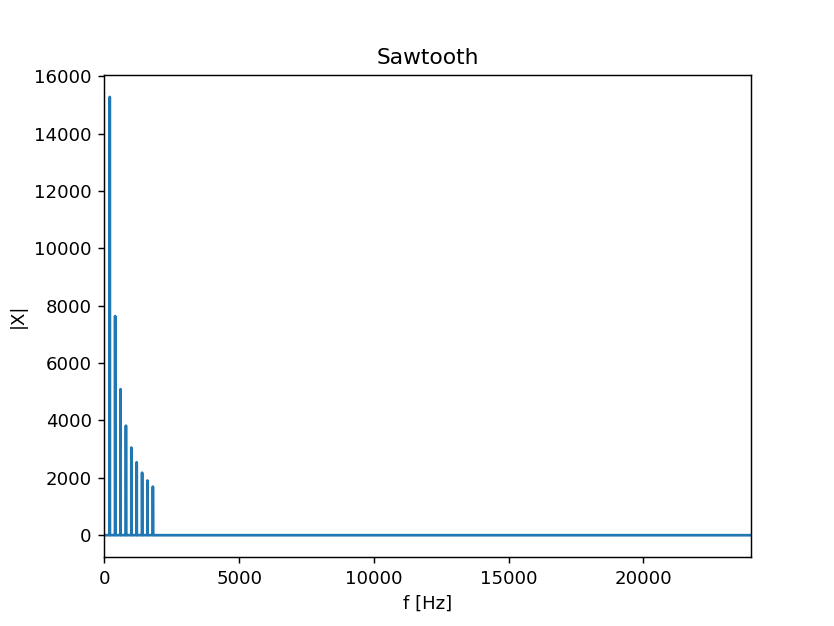

Static output:


Dynamic output:


interactive(children=(IntSlider(value=10, description='nPartials'), IntSlider(value=200, description='f0', max…

In [6]:
# visualize spectrum

nPartials   = 10 # number of partials
f0          = 200  # signal frequency
fs          = 48000
N           = fs

t = np.linspace(0,N/fs,N)
f = np.linspace(-0.5,0.5,fs)

x = sawtooth(t,f0,fs,nPartials)
 
fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)
plt.title("Sawtooth")

X = abs(np.fft.fft(x))
X = np.fft.fftshift(X)
f = np.linspace(-fs/2,fs/2,len(X))

line, = ax.plot(f,X);

ax.set_xlabel('f [Hz]');
ax.set_ylabel('|X|');
ax.set_xlim(0, fs/2) 

print('Static output:')
ipd.display(ipd.Audio(x, rate=fs))
print('Dynamic output:')

def update(nPartials = widgets.IntSlider(min = 0, max= 100, step=1, value=10),
          f0 = widgets.IntSlider(min = 1, max= 1000, step=1, value=200)):         
     
    x = sawtooth(t,f0,fs,nPartials)
 
    X = abs(np.fft.fft(x))
    X = np.fft.fftshift(X)
    
    line.set_ydata(X)
    fig.canvas.draw_idle()
 
    ipd.display(ipd.Audio(x, rate=fs))
    
        
interact(update);

# Time Domain 

## Triangular

<IPython.core.display.Javascript object>


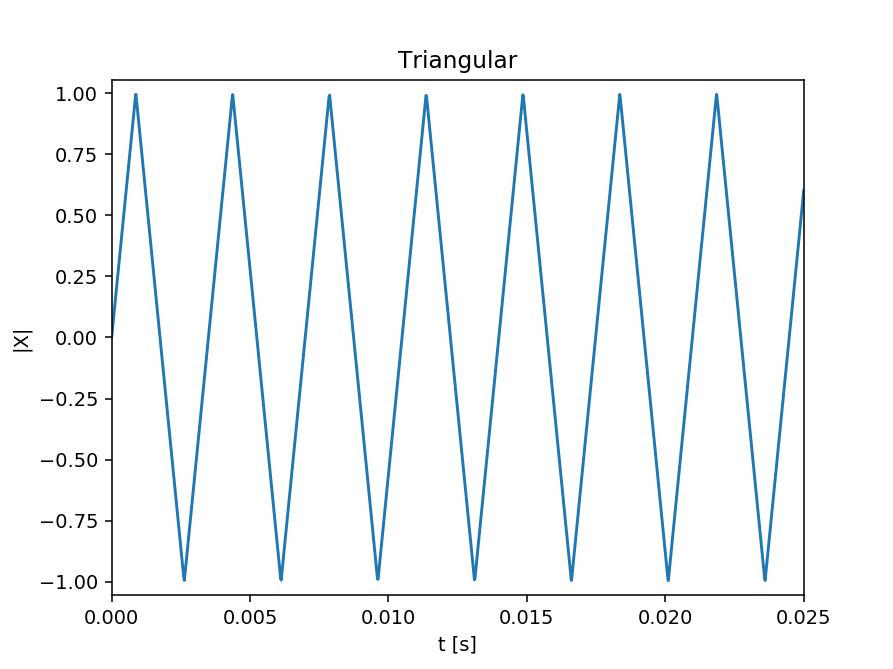

Static output:


Dynamic output:


interactive(children=(IntSlider(value=5, description='nPartials'), IntSlider(value=200, description='f0', max=…

In [10]:
nPartials   = 5 # number of partials
f0          = 200  # signal frequency
fs          = 48000
N           = fs

t = np.linspace(0,N/fs,N)
x = triang(t,f0,fs,nPartials)
 
fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)
plt.title("Triangular")

line, = ax.plot(t,x);

ax.set_xlabel('t [s]');
ax.set_ylabel('|X|');
ax.set_xlim(0, 0.025) 

print('Static output:')
ipd.display(ipd.Audio(x, rate=fs))
print('Dynamic output:')

def update(nPartials = widgets.IntSlider(min = 0, max= 100, step=1, value=5),
          f0 = widgets.IntSlider(min = 1, max= 1000, step=1, value=200)):
 
    x = triang(t,f0,fs,nPartials)
    
    line.set_ydata(x)
    fig.canvas.draw_idle()
 
    ipd.display(ipd.Audio(x, rate=fs))
    
        
interact(update);

# Square

For the square wave, ripples occur at the edges, referred
to as Gibb's phenomenon.

<IPython.core.display.Javascript object>


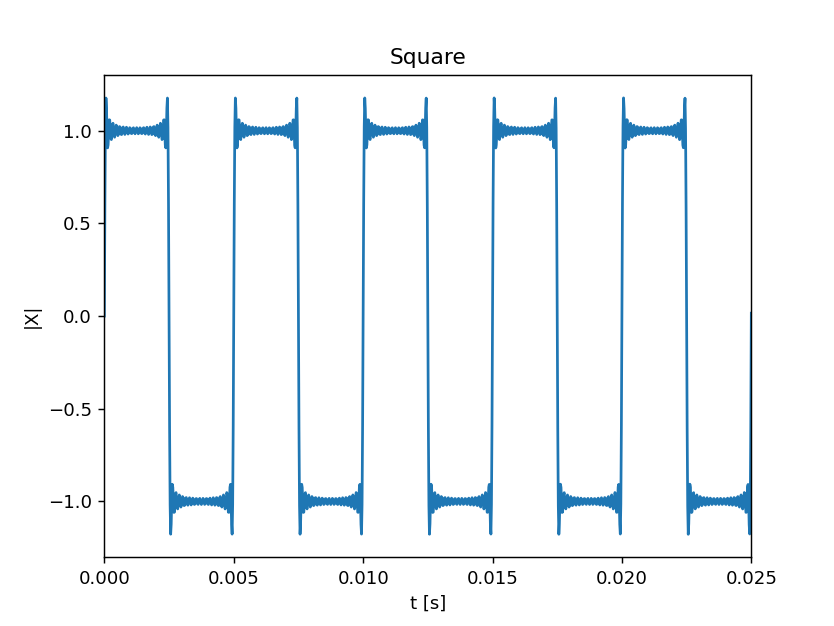

Static output:


Dynamic output:


interactive(children=(IntSlider(value=5, description='nPartials'), IntSlider(value=200, description='f0', max=…

In [7]:
nPartials   = 5 # number of partials
f0          = 200  # signal frequency
fs          = 48000
N           = fs

t = np.linspace(0,N/fs,N)
x = square(t,f0,fs,nPartials)
 
fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)
plt.title("Square")

line, = ax.plot(t,x);

ax.set_xlabel('t [s]');
ax.set_ylabel('|X|');
ax.set_xlim(0, 0.025) 

print('Static output:')
ipd.display(ipd.Audio(x, rate=fs))
print('Dynamic output:')

def update(nPartials = widgets.IntSlider(min = 0, max= 100, step=1, value=5),
          f0 = widgets.IntSlider(min = 1, max= 1000, step=1, value=200)):
 
    x = square(t,f0,fs,nPartials)
 
 
    
    line.set_ydata(x)
    fig.canvas.draw_idle()
 
    ipd.display(ipd.Audio(x, rate=fs))
    
        
interact(update);

# Sawtooth

<IPython.core.display.Javascript object>


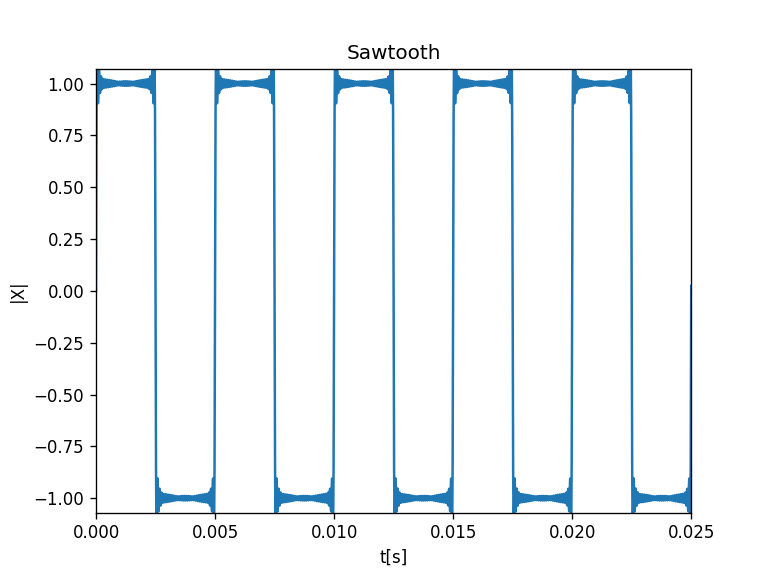

Static output:


Dynamic output:


interactive(children=(IntSlider(value=5, description='nPartials'), IntSlider(value=200, description='f0', max=…

In [13]:
nPartials   = 5 # number of partials
f0          = 200  # signal frequency
fs          = 48000
N           = fs

t = np.linspace(0,N/fs,N)
x = sawtooth(t,f0,fs,nPartials)
 
fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)
plt.title("Sawtooth")

line, = ax.plot(t,x);

ax.set_xlabel('t[s]');
ax.set_ylabel('|X|');
ax.set_xlim(0, 0.025) 


print('Static output:')
ipd.display(ipd.Audio(x, rate=fs))
print('Dynamic output:')

def update(nPartials = widgets.IntSlider(min = 0, max= 100, step=1, value=5),
          f0 = widgets.IntSlider(min = 1, max= 1000, step=1, value=200)):
 
    x = sawtooth(t,f0,fs,nPartials)
 
 
    
    line.set_ydata(x)
    fig.canvas.draw_idle()
 
    ipd.display(ipd.Audio(x, rate=fs))
    
        
interact(update);